In [3]:
from pyspark.sql import SparkSession

In [5]:
spark=SparkSession.builder.appName('AssignmentPart2').getOrCreate()

24/05/17 19:56:29 WARN Utils: Your hostname, Roshans-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.0.30 instead (on interface en0)
24/05/17 19:56:29 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/17 19:56:29 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/05/17 19:56:30 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [6]:
# To read csv file / Create dataFrame using dataset2.csv

data = spark.read.csv('dataset2.csv',header=True,inferSchema=True)

In [7]:
data.printSchema();

root
 |-- X1: integer (nullable = true)
 |-- X2: double (nullable = true)
 |-- X3: double (nullable = true)
 |-- X4: double (nullable = true)
 |-- X5: double (nullable = true)
 |-- X6: integer (nullable = true)
 |-- X7: double (nullable = true)
 |-- X8: double (nullable = true)
 |-- X9: double (nullable = true)
 |-- X10: string (nullable = true)



In [8]:
data.show()

+---------+----+----+-------------------+------------------+-----+--------+----+-----+--------------------+
|       X1|  X2|  X3|                 X4|                X5|   X6|      X7|  X8|   X9|                 X10|
+---------+----+----+-------------------+------------------+-----+--------+----+-----+--------------------+
| 34811059|2.73| 0.1|  3.328944661018629|           24.5962|12314|129.9049|75.3| 29.5|Middle East & Nor...|
| 19842251|6.43| 2.0| 1.4743533878509398|          22.25083| 7103|130.1247|58.3|192.0|  Sub-Saharan Africa|
| 40381860|2.24| 0.5|        4.785169983|           27.5017|14646|118.8915|75.5| 15.4|             America|
|  2975029| 1.4| 0.1|        1.804106217|          25.35542| 7383|132.8108|72.5| 20.0|Europe & Central ...|
| 21370348|1.96| 0.1|        18.01631327|          27.56373|41312|117.3755|81.5|  5.2| East Asia & Pacific|
|  8331465|1.41| 0.3|        8.183160018|          26.46741|43952|124.1394|80.4|  4.6|Europe & Central ...|
|  8868713|1.99| 0.1|       

In [10]:
# Removing column X10
total_data = data.drop('X10')

In [11]:
total_data.show()

+---------+----+----+-------------------+------------------+-----+--------+----+-----+
|       X1|  X2|  X3|                 X4|                X5|   X6|      X7|  X8|   X9|
+---------+----+----+-------------------+------------------+-----+--------+----+-----+
| 34811059|2.73| 0.1|  3.328944661018629|           24.5962|12314|129.9049|75.3| 29.5|
| 19842251|6.43| 2.0| 1.4743533878509398|          22.25083| 7103|130.1247|58.3|192.0|
| 40381860|2.24| 0.5|        4.785169983|           27.5017|14646|118.8915|75.5| 15.4|
|  2975029| 1.4| 0.1|        1.804106217|          25.35542| 7383|132.8108|72.5| 20.0|
| 21370348|1.96| 0.1|        18.01631327|          27.56373|41312|117.3755|81.5|  5.2|
|  8331465|1.41| 0.3|        8.183160018|          26.46741|43952|124.1394|80.4|  4.6|
|  8868713|1.99| 0.1|        5.109538292|          25.65117|14365|128.6024|70.6| 43.3|
|   348587|1.89| 3.1|        3.131921321|          27.24594|24373|124.3862|72.2| 14.5|
|148252473|2.38|0.06|0.31916100201885805|  

In [16]:
# Graph

In [19]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

In [21]:
#Select the X2 and X8 columns from the Dataframe
X2_X8_data = total_data.select('X2','X8')

#Convert the Dataframe to an RDD of tuples and extract X2 and X8 values
rdd_X2_X8 = X2_X8_data.rdd.map(lambda x:(x['X2'],x['X8']))
X2_values = rdd_X2_X8.map(lambda x: x[0]).collect()
X8_values = rdd_X2_X8.map(lambda x:x[1]).collect()

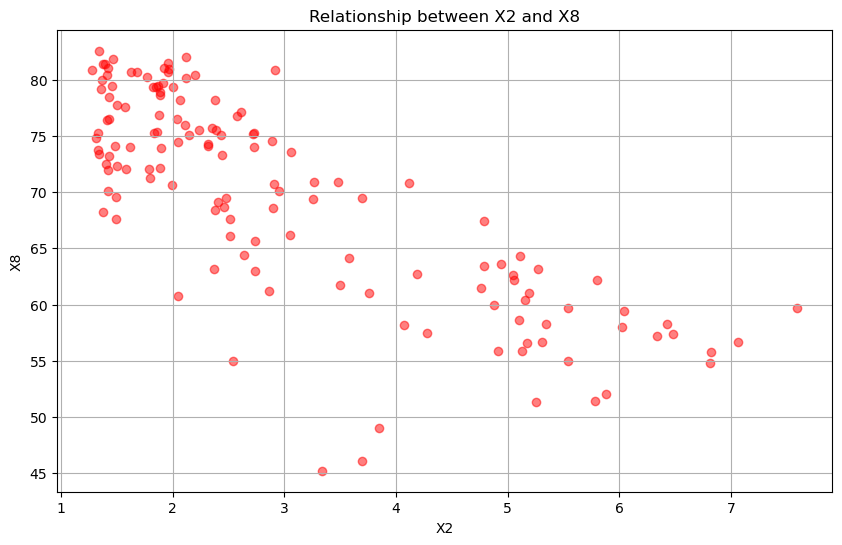

In [23]:
# Plot the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X2_values,X8_values, color='red',alpha = 0.5)
plt.title('Relationship between X2 and X8')
plt.xlabel('X2')
plt.ylabel('X8')
plt.grid(True)
plt.show()

In [25]:
# Register the DataFrame as a temporary view
total_data.createOrReplaceTempView('data')

#Execute SQL query to filter X2 greater than 1.0 and X8 greater than 70
result = spark.sql("Select X2,X8 FROM data where X2 > 1.0 AND X8 > 70 ")

#Show Result
result.show()

+----+----+
|  X2|  X8|
+----+----+
|2.73|75.3|
|2.24|75.5|
| 1.4|72.5|
|1.96|81.5|
|1.41|80.4|
|1.99|70.6|
|1.89|72.2|
|1.83|75.3|
|1.42|70.1|
|1.82|79.4|
|2.91|70.7|
|3.48|70.9|
| 1.9|73.9|
|1.43|73.2|
|1.68|80.7|
|1.89|78.9|
|2.43|75.1|
|1.91|79.7|
|1.43|76.5|
| 1.5|77.8|
+----+----+
only showing top 20 rows



In [27]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

In [29]:
# Prepare the data by selecting X2 and X8

data = total_data.select('X2','X8')

#Split the data into training and testing sets
train,test = data.randomSplit([0.7,0.3])

In [31]:
# Defining the vector assembler
assembler = VectorAssembler(inputCols=['X2'],outputCol='features')

#Transform the data using the vector assembler
train = assembler.transform(train)
test = assembler.transform(test)

In [33]:
# Define the linear regression model
lr = LinearRegression(featuresCol='features', labelCol='X8')



In [35]:
# Train the model using the training data
lr_model = lr.fit(train)

#Make predictions on the testing data 
predictions = lr_model.transform(test)

24/05/17 19:56:44 WARN Instrumentation: [bf0bc850] regParam is zero, which might cause numerical instability and overfitting.
24/05/17 19:56:44 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/05/17 19:56:44 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


In [37]:
#Evaluate the model's performance 
evaluator = RegressionEvaluator(labelCol='X8',predictionCol="prediction",metricName='rmse')
rmse=evaluator.evaluate(predictions)

#Print the linear Regression 
print('Linear Regression:',rmse)

Linear Regression: 5.455230490103513


In [39]:
# Define the features excluding X8 and the target column
feature_column = ['X1','X2','X3','X4','X5','X6','X7','X9']
target_column = 'X8'

#Define the predictor
predictors = [col for col in feature_column if col != target_column]

#Create a vector assembler to combine all the feature columns
assembler = VectorAssembler(inputCols = feature_column,outputCol='features')

In [41]:
#Define the vector assembler
assembler = VectorAssembler(inputCols=predictors,outputCol='features')

#Apply the vector assembler to the DataFrame
assembled_data = assembler.transform(total_data)

In [43]:
# Split the data into training and test sets
train,test = assembled_data.randomSplit([0.7,0.3])

#Check if X8 exists in the train dataframe
if 'X8' not in train.columns:
    raise ValueError("Column X8 does not exist in the train DataFrame.")

In [45]:
# Check if 'X8' exists in the test DataFrame
if 'X8' not in test.columns:
    raise ValueError("Column 'X8' does not exist in the test DataFrame.")
    
    
# Define the Lasso regression model
lasso = LinearRegression(featuresCol='features', labelCol=target_column, elasticNetParam=1.0, regParam=0.1)

In [47]:
# Train the model using the training data
lasso_model = lasso.fit(train)

# Make predictions on the testing data
predictions = lasso_model.transform(test)

In [48]:
# Evaluate the model's performance
evaluator = RegressionEvaluator(labelCol=target_column, predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)


# Print the lasso regression (RMSE)
print("Lasso Regression:", rmse)

Lasso Regression: 3.4021480352997266
